In [525]:
import numpy as np
import pandas as pd
from datetime import datetime

In [526]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [527]:
# The Id is unnecessary, so drop these columns
ID = test_df['Id']
train_df=train_df.drop('Id',axis=1)
test_df=test_df.drop('Id',axis=1)
train_df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [528]:
test_df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [529]:
# Convert the date column to a python datetime
train_df['Open Date']=pd.to_datetime(train_df['Open Date'])
test_df['Open Date']=pd.to_datetime(test_df['Open Date'])
train_df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [530]:
# find how long a restaurant has been open relative to the newest restaurant opening
refDate = train_df['Open Date'].max()
train_df['Open Date'] = (refDate - train_df['Open Date']).apply(lambda x: x.days)
test_df['Open Date'] = (refDate - test_df['Open Date']).apply(lambda x: x.days)
train_df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,5306,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2172,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,322,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,723,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,1722,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [531]:
# one-hot encode the city, city group and type which are categorical variables
cityOnehot=pd.get_dummies(train_df['City'])
cityGroupOnehot=pd.get_dummies(train_df['City Group'])
cityTypeOnehot=pd.get_dummies(train_df['Type'])

cityOnehottest=pd.get_dummies(test_df['City'])
cityGroupOnehottest=pd.get_dummies(test_df['City Group'])
cityTypeOnehottest=pd.get_dummies(test_df['Type'])

In [533]:
# not all cities are common to the train and test set, so we need to add the missing columns to each set
print(test_df2.shape)
print(train_df2.shape)

testcol=test_df2.columns.tolist()
traincol=train_df2.drop('revenue',axis=1).columns.tolist()

commoncol=set(traincol).intersection(set(testcol))

testcolmissing = list(set(traincol)-commoncol)
traincolmissing = list(set(testcol)-commoncol)

# insert missing columns with 0 for one-hot encoding
for i in traincolmissing:
    train_df2[i]=0
    
for i in testcolmissing:    
    test_df2[i]=0

(100000, 101)
(137, 78)


In [534]:
# check that the shapes are the same (train will have one extra column for revenue)
print(test_df2.shape)
print(train_df2.shape)

(100000, 107)
(137, 108)


In [535]:
y_train = train_df2['revenue']
X_train = train_df2.drop('revenue',axis=1)
X_test = test_df2[X_train.columns]

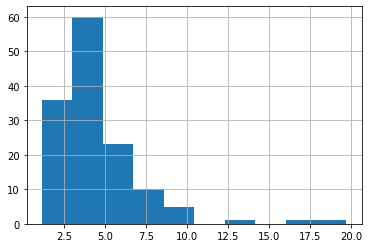

In [536]:
# The revenus is not normally distributed
(y_train/1e6).hist()

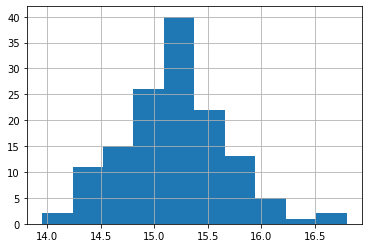

In [537]:
# applying the log transforms the distribution to be more Gaussian
(np.log(y_train)).hist()

In [538]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=200)
RFR.fit(X_train,np.log(y_train))
ypred = RFR.predict(X_train)

In [539]:
RFR.score(X_train,np.log(y_train))

0.9005073653187995

In [540]:
# apply model to test set, take the exponential to undo the log
y_test_predict = RFR.predict(X_test)
y_test_predict = np.exp(y_test_predict)

In [541]:
y_test_predict

array([3544671.39258022, 2989741.09387768, 3291136.93169473, ...,
       3059066.70994856, 3343205.18705047, 5595162.20264782])

In [542]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ypred,y_train))

5140186.927462658

In [543]:
submission_df = test_df2
submission_df['Prediction']=y_test_predict
submission_df = submission_df.join(ID)
submission_df = submission_df[['Id','Prediction']]
test_df2=test_df2.drop('Prediction',axis=1)

In [544]:
submission_df.to_csv('Submissions_Predict_Restaurant_Revenue.csv',index=False)

In [545]:
print(train_df2.shape)
X_train.shape

(137, 108)


(137, 107)

In [546]:
import xgboost as xgb
param = {'max_depth':200, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.3, 
         'num_round':10000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'}


progress = dict()
xgbtrain = xgb.DMatrix(X_train.values,np.log(y_train.values))
watchlist  = [(xgbtrain,'train-rmse')]

bst = xgb.train(param, xgbtrain)
preds = np.exp(bst.predict(xgb.DMatrix(X_train.values)))
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(preds,y_train))
y_predictxg = np.exp(bst.predict(xgb.DMatrix(X_test.values)))

[17:55:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




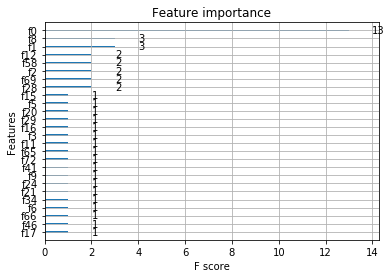

In [547]:
xgb.plot_importance(bst)

In [548]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(preds,y_train))

2932024.6165547604

In [549]:
submission_df = test_df2
submission_df['Prediction']= y_predictxg
submission_df = submission_df.join(ID)
submission_df = submission_df[['Id','Prediction']]
test_df2=test_df2.drop('Prediction',axis=1)

In [550]:
submission_df

,Id,Prediction
0,0,1770978.875
1,1,1801879.375
2,2,1727319.875
3,3,2033264.500
4,4,2033264.500
...,...,...
99995,99995,2728021.000
99996,99996,2317178.750
99997,99997,1943428.500
99998,99998,2287650.500


In [551]:
submission_df.to_csv('Submissions_Predict_Restaurant_Revenue_xg.csv',index=False)